# <span style = "color:blue">Lab 7 Exercise</span>
<div class = "alert alert-danger">
Name your file after your student (matric) number, for example, A1234567B_Lab7Ex.ipynb

Please let the lab facilitator check your work and mark your attendance before leaving the lab.
</div>

## <span style = "color:blue">Question 1</span>
Write a program to solve the following set of ordinary differential equations: 
$$ \frac{dx}{dt} = a\cos(bt) $$

$$ \frac{dy}{dt} = cx + dt $$

where $a, b, c$ and $d$ are the ode parameters. Given the initial conditions $x0 = 0$ and $y0 = -3$, plot the numerical solutions for $x$ and $y$ over time. Create four subplots (with layout 2 x 2, appropriate titles, labels and legends) with each subplot taking on the following set of values for the parameters:

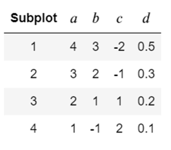

### Additional Notes:
Consider using the following in your program:
- Set t = np.linspace(0,6.3,100)
- Set figure size to be 12 inches in width and 10 inches in height
- The parameter values could be passed into the model function as a sequence of optional arguments: $args = (...,...,...,...)$ when calling the odeint function. 

In [46]:
class SubPlotValues:
    def __init__(self, a, b, c, d):
        self.a, self.b, self.c, self.d =a,b,c,d
        
        self.enum = {
            0: self.a,
            1: self.b,
            2: self.c,
            3: self.d   
        }
        
    def __getitem__(self, value):
        return self.enum[value]
        
        
subplot_values = [
    SubPlotValues(4,  3, -2, 0.5),
    SubPlotValues(3,  2, -1, 0.3),
    SubPlotValues(2,  1,  1, 0.2),
    SubPlotValues(1, -1,  2, 0.1)
]

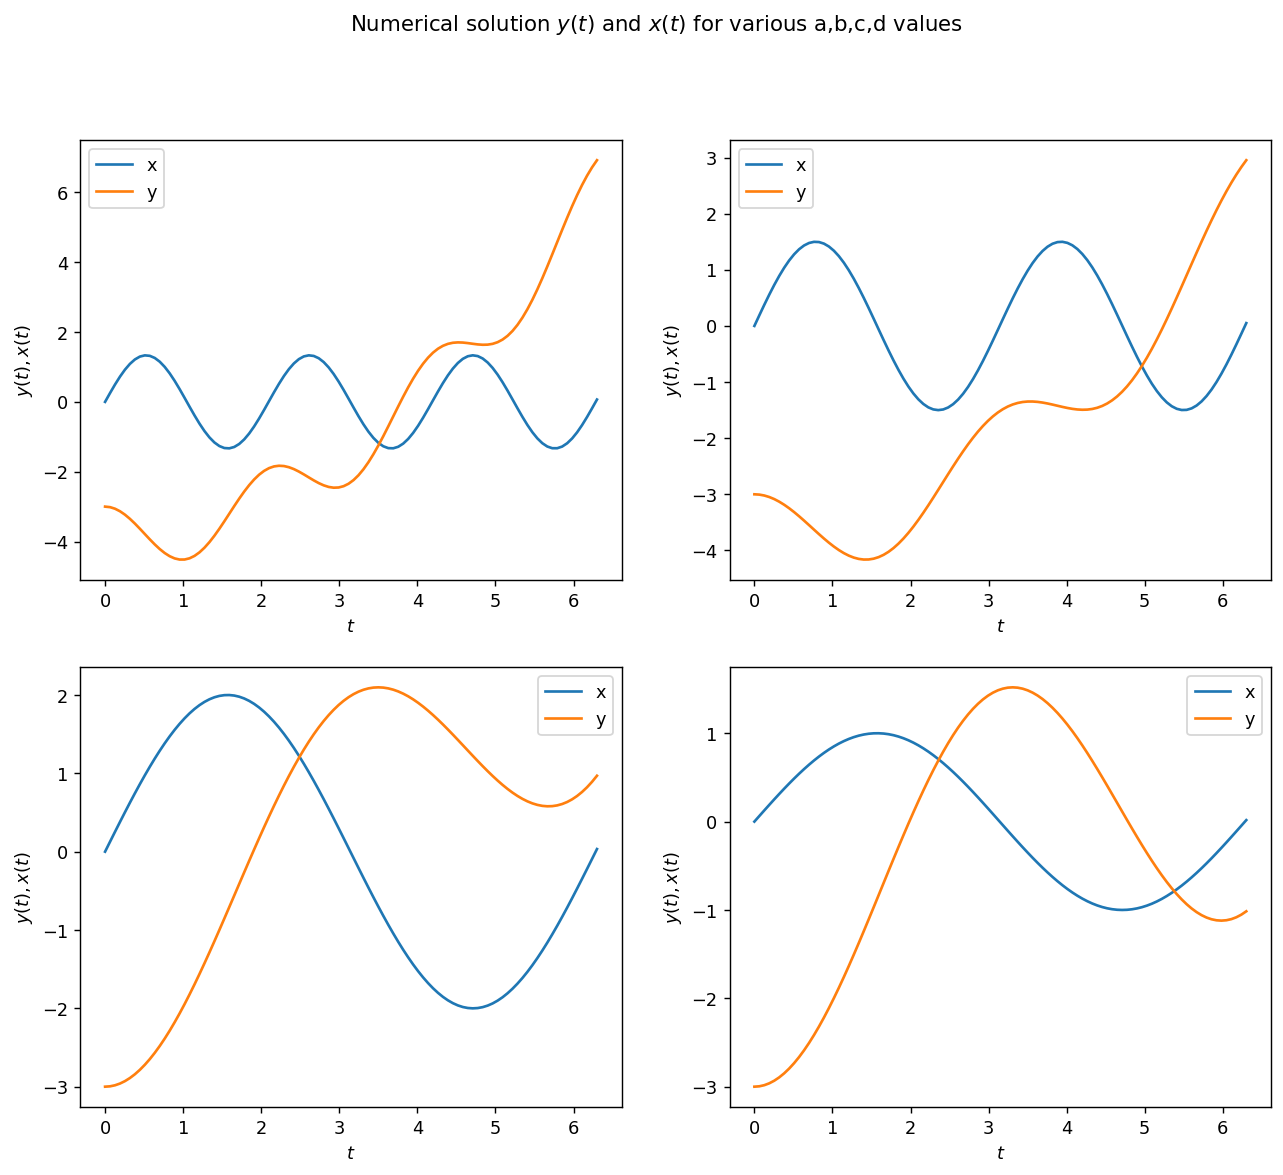

In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

t = np.linspace(0,6.3,100)

x_0 = 0
y_0 = -3
z_0 = [x_0, y_0]

def model(z, t, a, b, c, d):
#     a, b, c, d = arguments
    x,y = z
    dxdt = a * math.cos(b * t)
    dydt = (c * x) + (d *t)
    dzdt = [dxdt, dydt]
    
    return dzdt
    
# plt.figure(1,(14,5))

fig, axes = plt.subplots(2,2, figsize=(12,10), dpi = 128)
fig.suptitle("Numerical solution $y(t)$ and $x(t)$ for various a,b,c,d values")
enum = {
    0: "a",
    1: "b",
    2: "c",
    3: "d"
}

for i in range(len(subplot_values)):
    subplot_value = subplot_values[i]
    zns = odeint(model, z_0, t, args=(
        
            subplot_value.a,
            subplot_value.b,
            subplot_value.c,
            subplot_value.d
        
    ))
    xns = zns[:,0]
    yns = zns[:,1]
    
    row = i//2
    column = i%2
    
    axes[row, column].plot(t,xns,"-",label=f"x")
    axes[row, column].plot(t,yns, "-", label=f"y")
    
# plt.title("Numerical solution $y(t)$ for various $k$ values")        
    axes[row, column].set_xlabel("$t$");axes[row, column].set_ylabel("$y(t), x(t)$")
    axes[row, column].legend()
plt.show()
    
    

## <span style = "color:blue">Question 2</span>
Modify Example 5A to incorporate the logistic term for the prey population. Refer to slides 20 to 25 of your lecture notes for the parameters and initial populations you could use. What can you infer from the visuals?

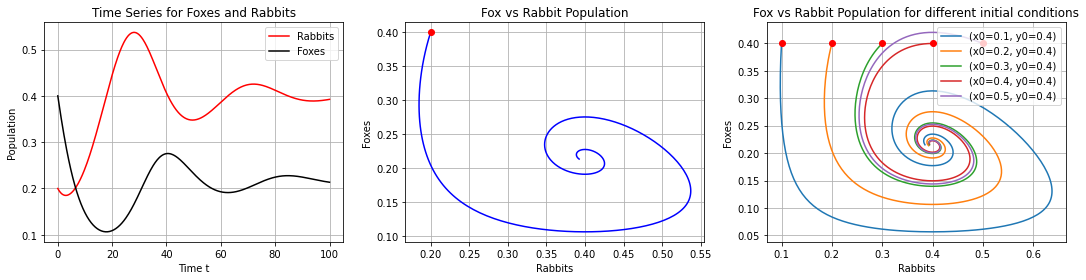

In [45]:
# Example 5A: Modeling population dynamics via the Lotka-Volterra equation; populations are normalised

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Declare the system parameters
a,b,c,d = 0.18,0.5,0.2,0.5   # Try [0.3,0.0,0.2,0.0], [0.18,.0.5,0.2,0.5]; remember 0<a<= b; 0<c<=d

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z[0],z[1]
    dxdt = a * x * (1-x) - (b * x * y)   # Implementation of L-V equation 
    dydt = d*x*y - c*y   # Implementation of L-V equation
    dzdt = [dxdt,dydt]
    return dzdt
    #return [z[0]*(a - b*z[1]), z[1]*(d*z[0] - c)]
    
x0,y0 = 0.2,0.4   # Initial populations of rabbit and fox respectively; try [0.4,0.36] equilibrium populations
z0 = [x0,y0]   
t = np.linspace(0,100,400)   # Time mesh
zns = odeint(model,z0,t)     # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                             # odeint() will return the computed solutions at the requested time values,
                             # i.e. a set of x(t) values and a set of y(t) values (solutions) 
# Set figure size
plt.figure(1,(15,4))

# Plot time series for foxes and rabbits
plt.subplot(1,3,1)
plt.title("Time Series for Foxes and Rabbits")
plt.plot(t,zns[:,0],"r-",label = "Rabbits")
plt.plot(t,zns[:,1],"k-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend(loc=1)

# Plot phase portrait (y(t) vs x(t))
plt.subplot(1,3,2)
plt.title("Fox vs Rabbit Population")
plt.plot(zns[:,0],zns[:,1],"b-")
plt.plot(z0[0],z0[1],'ro')   # Indicates initial starting point or initial populations
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True)

# Plot phase portraits for different initial number of rabbits x0
plt.subplot(1,3,3)
x0list = [0.1,0.2,0.3,0.4,0.5]   # List of different initial rabbit population to plot
y0 = 0.4
for x0 in x0list:
    z0 = [x0,y0]
    zns = odeint(model,z0,t)
    mylabel = "(x0=" + str(x0) + ", y0=" + str(y0) + ")"
    plt.plot(zns[:,0],zns[:,1],"-",label=mylabel)
    plt.plot(z0[0],z0[1],'ro')   # Indicates initial starting point or initial populations
    
plt.title("Fox vs Rabbit Population for different initial conditions")
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()